### 分類した水分子を表にする

In [1]:
import sys 
sys.path.append('..')

In [2]:
import numpy as np
import os
import pandas as pd
from lib.plot import plot_histogram
import matplotlib.pyplot as plt
from lib.path import get_analysis_results_labeled_water_path

In [3]:
DATA_INFO_START = 7
DATA_INFO_END = 10

In [4]:
def get_df_info(labeled_water_num_path):
    df = pd.read_csv(labeled_water_num_path)
    
    total_displaceable = df['displaceable_water_num'].sum()
    total_non_displaceable = df['non_displaceable_water_num'].sum()
    total_water_num = total_displaceable + total_non_displaceable

    summary_stats = df.describe()
    dis_mean = summary_stats['displaceable_water_num']['mean']
    dis_std = summary_stats['displaceable_water_num']['std']

    non_dis_mean = summary_stats['non_displaceable_water_num']['mean']
    non_dis_std = summary_stats['non_displaceable_water_num']['std']

    path_info = labeled_water_num_path.split("/")

    return df, path_info[DATA_INFO_START:DATA_INFO_END], int(total_water_num), f"dis: {int(total_displaceable)} ({dis_mean:.2f}±{dis_std:.2f})", f"non: {int(total_non_displaceable)} ({non_dis_mean:.2f}±{non_dis_std:.2f})"

In [5]:
ligand_voxel_nums = [10, 9, 8, 6, 4]
classifying_rule_names = ["WaterClassifyingRuleCenter", "WaterClassifyingRuleSurface"]
ligand_pocket_definer_names = ["LigandPocketDefinerGhecom", "LigandPocketDefinerOriginal"]

In [6]:
ligand_voxel_num = ligand_voxel_nums[2]
classifying_rule = classifying_rule_names[1]
ligand_pocket_definer = ligand_pocket_definer_names[1]

labeled_water_num_path = get_analysis_results_labeled_water_path(ligand_voxel_num, classifying_rule, ligand_pocket_definer)
df_info = get_df_info(labeled_water_num_path)

In [7]:
df_info[1:]

(['LigandPocketDefinerOriginal',
  'ligand_pocket_voxel_num_8',
  'WaterClassifyingRuleSurface'],
 74138,
 'dis: 38591 (14.19±7.69)',
 'non: 35547 (13.07±6.99)')

In [8]:
df = df_info[0]

In [9]:
df

,pdb_name,displaceable_water_num,non_displaceable_water_num
0,1qan,18.0,8.0
1,2oxd,11.0,10.0
2,3t0b,11.0,10.0
3,4sga,24.0,12.0
4,10gs,22.0,24.0
...,...,...,...
2714,5dey,18.0,20.0
2715,5dhu,3.0,4.0
2716,5dit,29.0,23.0
2717,5dlx,21.0,21.0


## 水分子のヒストグラム

In [10]:
def plot_histogram(df):
    # 総水分子数の列を追加
    df['total_water_num'] = df['displaceable_water_num'] + df['non_displaceable_water_num']

    # ヒストグラムの作成
    plt.figure(figsize=(8, 6))
    plt.hist(df['total_water_num'], bins=40, color='purple', edgecolor='black')
    plt.title('Histogram of Total Water Numbers')
    plt.xlabel('Total Water Number')
    plt.ylabel('Frequency')


    # Plot histograms
    plt.figure(figsize=(14, 6))

    # Histogram for displaceable_water_num
    plt.subplot(1, 2, 1)
    plt.hist(df['displaceable_water_num'], bins=40, color='blue', edgecolor='black')
    plt.title('Histogram of Displaceable Water Numbers')
    plt.xlabel('Displaceable Water Number')
    plt.ylabel('Frequency')

    # Histogram for non_displaceable_water_num
    plt.subplot(1, 2, 2)
    plt.hist(df['non_displaceable_water_num'], bins=40, color='green', edgecolor='black')
    plt.title('Histogram of Non-displaceable Water Numbers')
    plt.xlabel('Non-displaceable Water Number')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

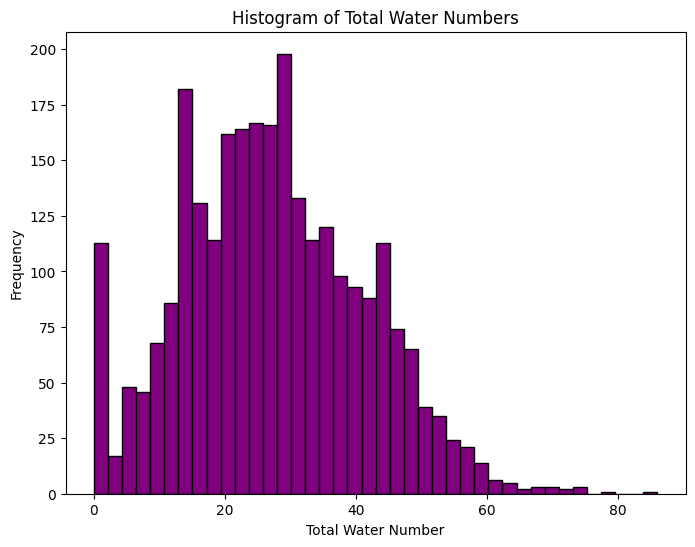

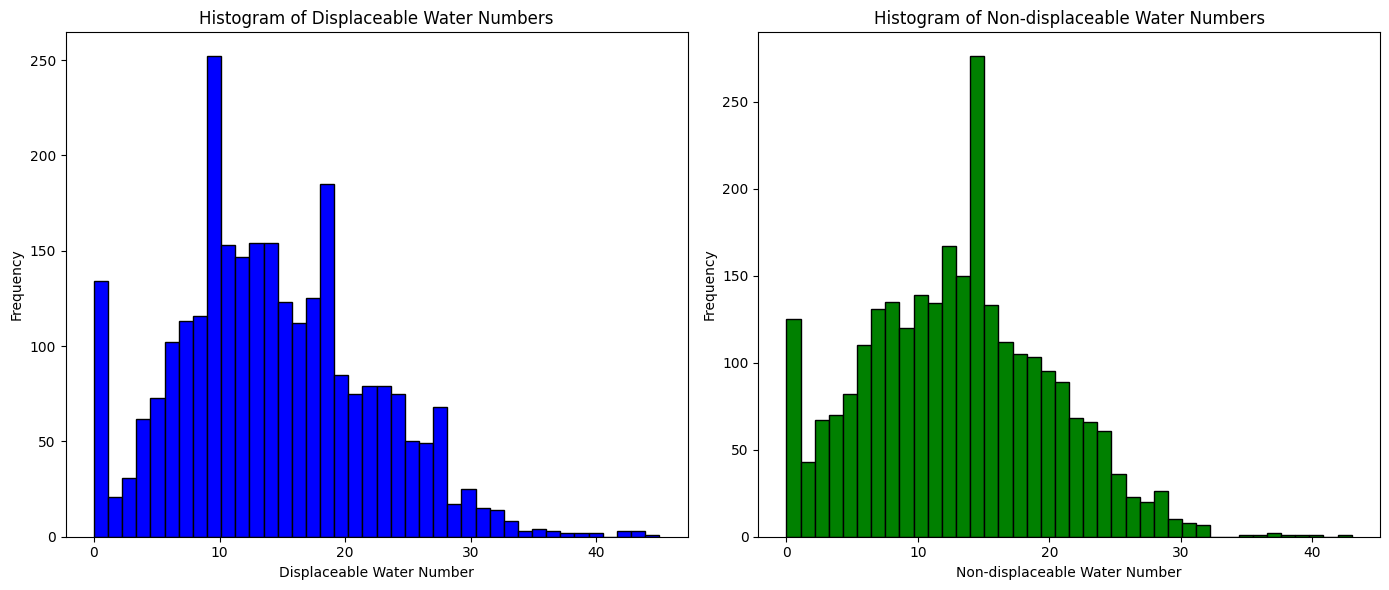

In [14]:
plot_histogram(df)

### dis, nonの水分子のpdbをゲット→たんぱく質ごとに数を数える→個数が違うやつを見つける

In [10]:
labeled_water_num_path_center = get_analysis_results_labeled_water_path(ligand_voxel_nums[0], classifying_rule_names[0], ligand_pocket_definer_names[1])
df_info_center = get_df_info(labeled_water_num_path_center)

center_total_water_nums = {}
for row in df_info_center[0].iterrows():
    total_water_num_in_protein = row[1]['displaceable_water_num'] + row[1]['non_displaceable_water_num']
    center_total_water_nums[row[1]['pdb_name']] = total_water_num_in_protein


In [11]:
labeled_water_num_path_surface = get_analysis_results_labeled_water_path(ligand_voxel_nums[0], classifying_rule_names[1], ligand_pocket_definer_names[1])
df_info_surface = get_df_info(labeled_water_num_path_surface)

surface_total_water_nums = {}
for row in df_info_surface[0].iterrows():
    total_water_num_in_protein = row[1]['displaceable_water_num'] + row[1]['non_displaceable_water_num']
    surface_total_water_nums[row[1]['pdb_name']] = total_water_num_in_protein

In [12]:
sum(center_total_water_nums.values())

104483.0

In [13]:
sum(surface_total_water_nums.values())

104483.0

In [14]:
for center_total_water_num, surface_total_water_num in zip(center_total_water_nums.items(), surface_total_water_nums.items()):
    if center_total_water_num[1] != surface_total_water_num[1]:
        print(center_total_water_num[0])
        print(center_total_water_num[1], surface_total_water_num[1])
        # if center_total_water_num.values() != surface_total_water_num.values():
        #     print(f"{center_total_water_num}")


## water num vs hydrophobicity

In [12]:
hydrophobicities = np.load('hydrophobicities_std.npy')

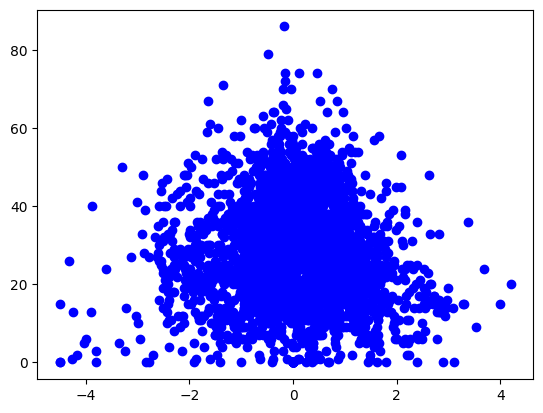

In [15]:
plt.scatter(hydrophobicities, df['total_water_num'], color='blue', label='Data points')  # 元のデータポイント

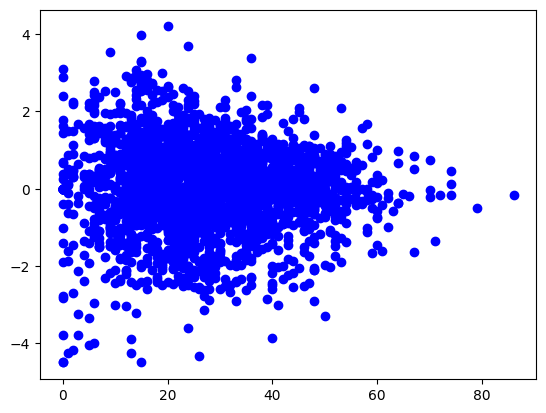

In [16]:
plt.scatter(df['total_water_num'], hydrophobicities, color='blue', label='Data points')  # 元のデータポイント

## 疎水性のポケットと親水性のポケットに存在している水の数

In [17]:
from lib.helper import get_list_from_pdb_text

In [19]:
hydrophobic_pdb = get_list_from_pdb_text('../../data/pdb_group/hydrophobic_pdb')
hydrophilic_pdb = get_list_from_pdb_text('../../data/pdb_group/hydrophilic_pdb')

In [20]:
hydrophobic_df = df[df['pdb_name'].isin(hydrophobic_pdb)].copy()
hydrophilic_df = df[df['pdb_name'].isin(hydrophilic_pdb)].copy()

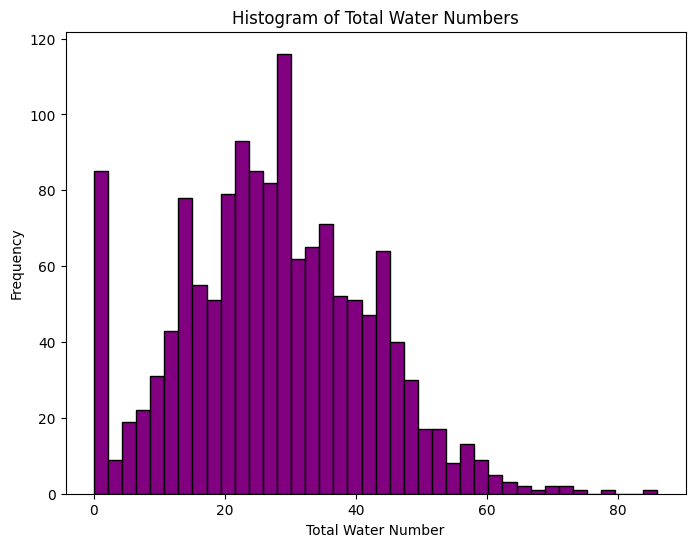

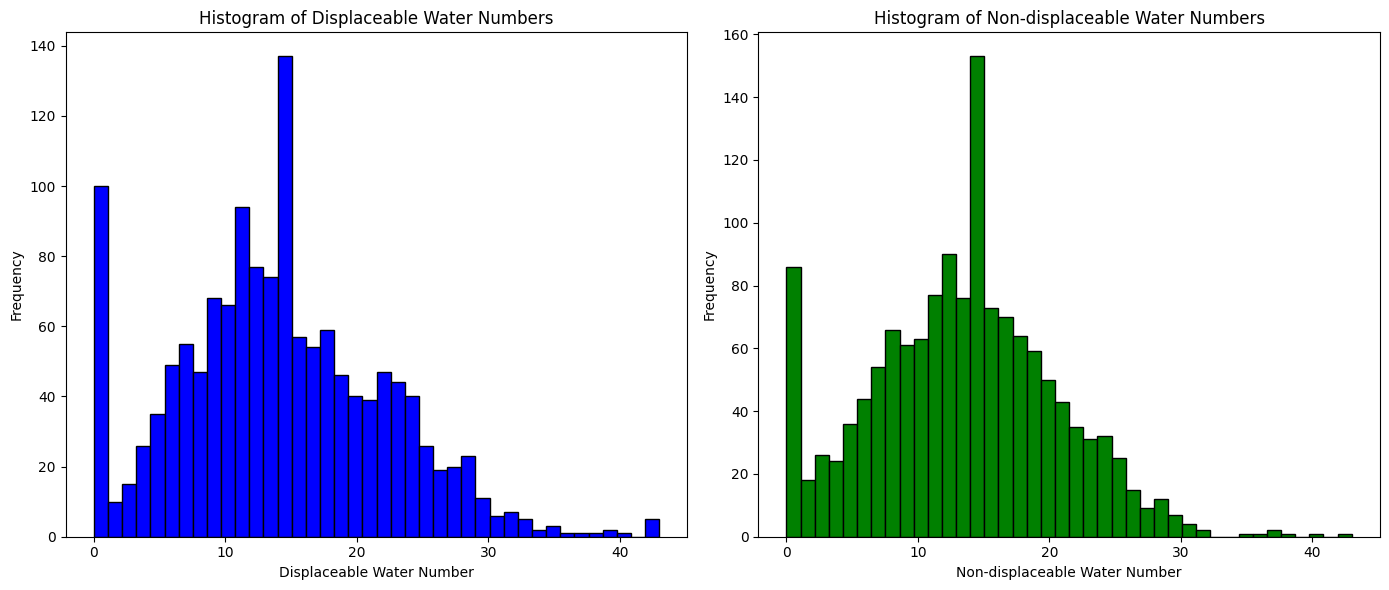

In [21]:
plot_histogram(hydrophilic_df)

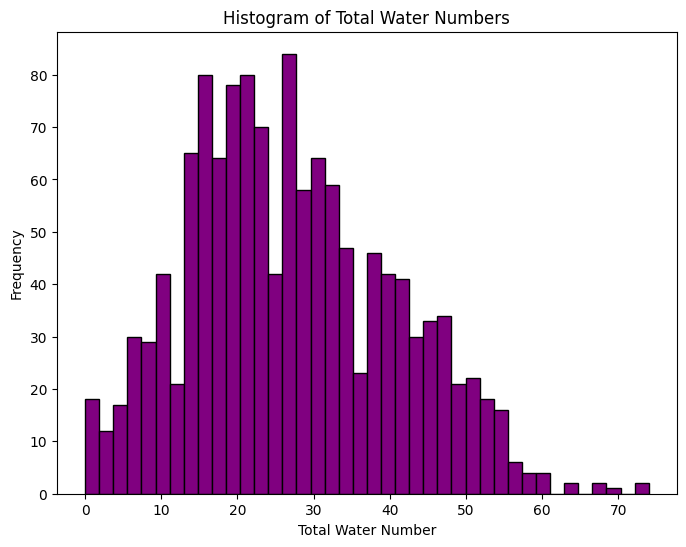

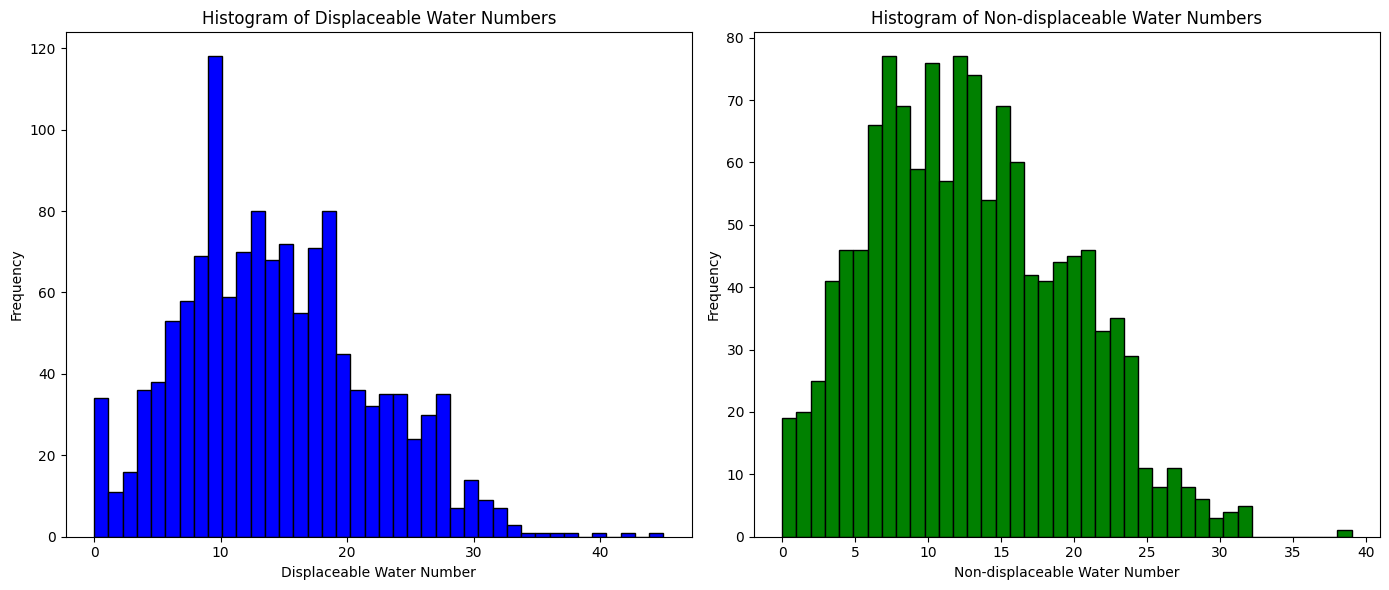

In [22]:
plot_histogram(hydrophobic_df)

In [23]:
hydrophobic_df.describe()

,displaceable_water_num,non_displaceable_water_num,total_water_num
count,1307.000000,1307.000000,1307.000000
mean,14.361132,12.716909,27.078041
std,7.415142,6.862200,13.461079
min,0.000000,0.000000,0.000000
25%,9.000000,7.000000,17.000000
50%,14.000000,12.000000,26.000000
75%,19.000000,18.000000,36.000000
max,45.000000,39.000000,74.000000


In [24]:
hydrophilic_df.describe()

,displaceable_water_num,non_displaceable_water_num,total_water_num
count,1412.000000,1412.000000,1412.000000
mean,14.037535,13.403683,27.441218
std,7.927069,7.086781,14.369186
min,0.000000,0.000000,0.000000
25%,9.000000,8.000000,18.000000
50%,13.000000,13.000000,27.000000
75%,19.000000,18.000000,37.000000
max,43.000000,43.000000,86.000000


In [57]:
def analyze_water_num(pdb_list_path):
    pdb = get_list_from_pdb_text(pdb_list_path)
    new_df = df[df['pdb_name'].isin(pdb)].copy()
    plot_histogram(new_df)
    print(new_df.describe())

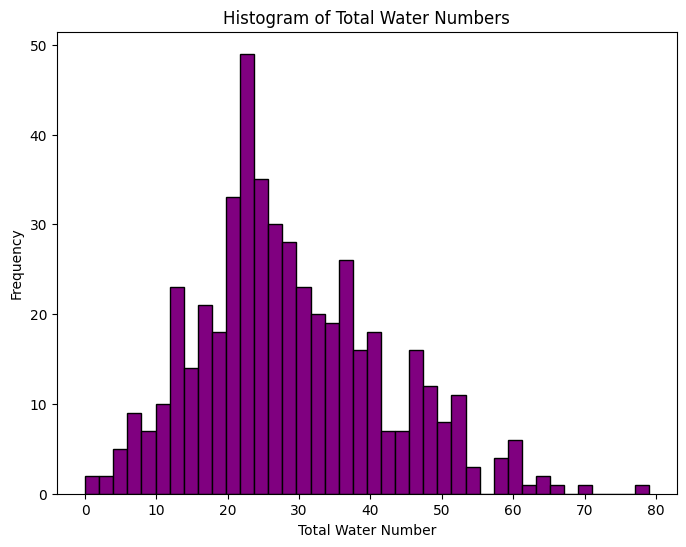

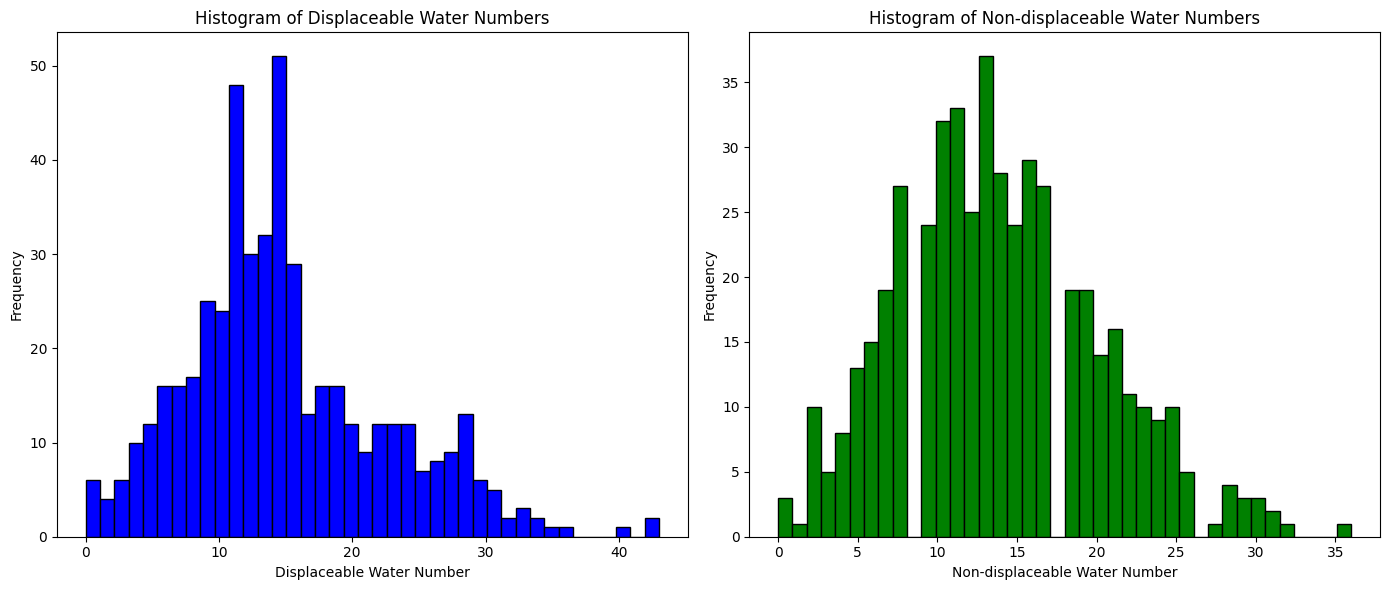

       displaceable_water_num  non_displaceable_water_num  total_water_num
count              488.000000                  488.000000       488.000000
mean                14.887295                   13.852459        28.739754
std                  7.548991                    6.348758        13.223862
min                  0.000000                    0.000000         0.000000
25%                 10.000000                    9.000000        20.750000
50%                 13.000000                   13.000000        27.000000
75%                 19.000000                   18.000000        36.000000
max                 43.000000                   36.000000        79.000000


In [58]:
analyze_water_num('../../data/hydrophilic_1000_pdb')

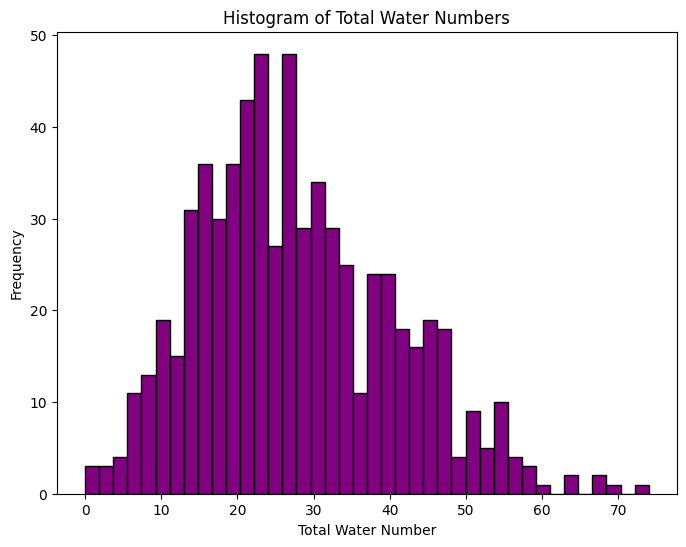

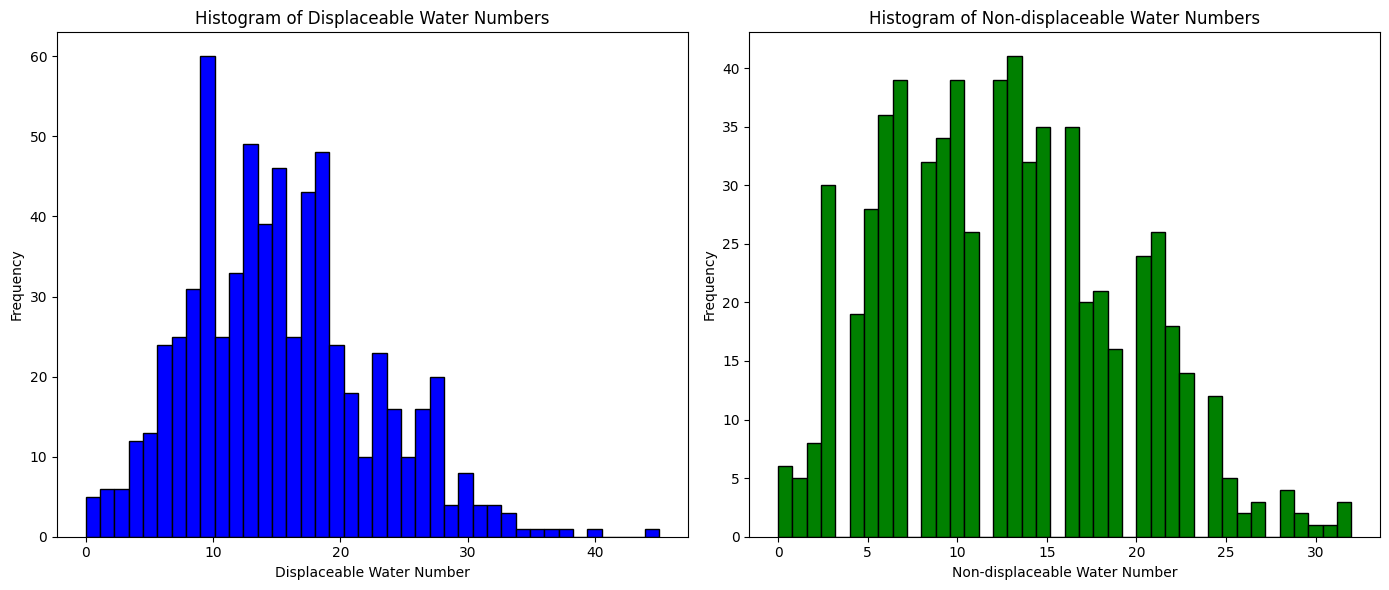

       displaceable_water_num  non_displaceable_water_num  total_water_num
count              656.000000                  656.000000       656.000000
mean                15.205793                   12.541159        27.746951
std                  7.188118                    6.504595        12.844578
min                  0.000000                    0.000000         0.000000
25%                 10.000000                    7.000000        18.000000
50%                 14.500000                   12.000000        26.000000
75%                 20.000000                   17.000000        36.000000
max                 45.000000                   32.000000        74.000000


In [59]:
analyze_water_num('../../data/hydrophobic_1000_pdb')

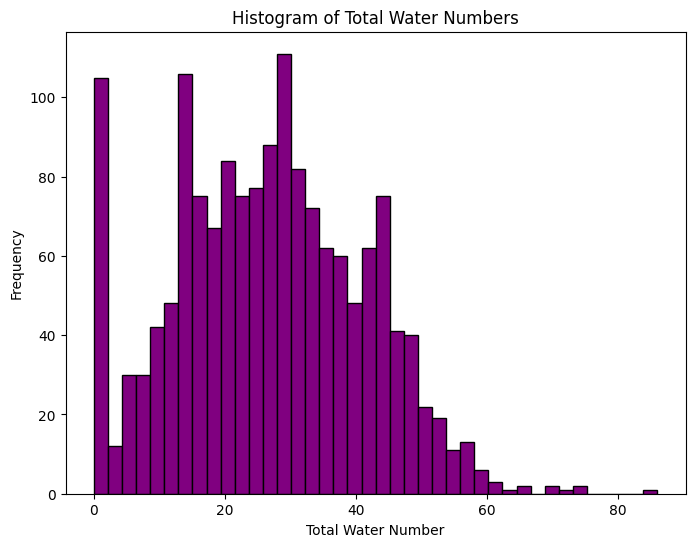

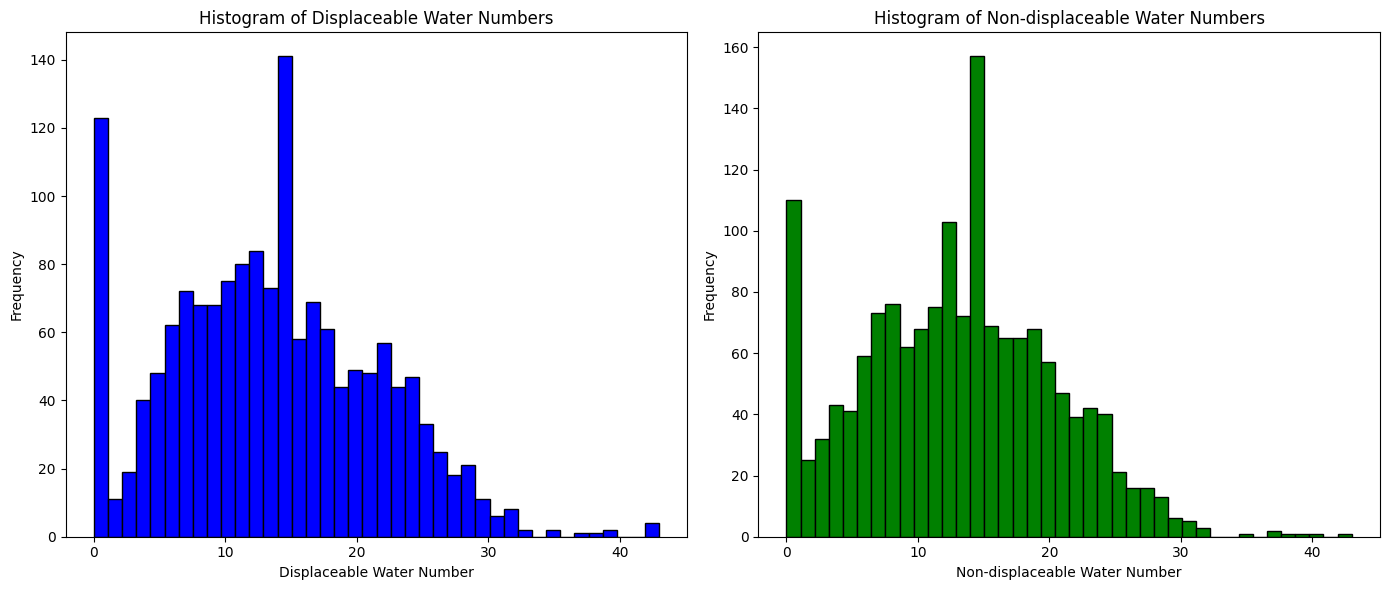

       displaceable_water_num  non_displaceable_water_num  total_water_num
count             1575.000000                 1575.000000      1575.000000
mean                13.556190                   13.053968        26.610159
std                  7.866532                    7.342519        14.544255
min                  0.000000                    0.000000         0.000000
25%                  8.000000                    8.000000        16.000000
50%                 13.000000                   13.000000        26.000000
75%                 19.000000                   18.000000        37.000000
max                 43.000000                   43.000000        86.000000


In [61]:
analyze_water_num('../../data/neutral_1000_pdb')

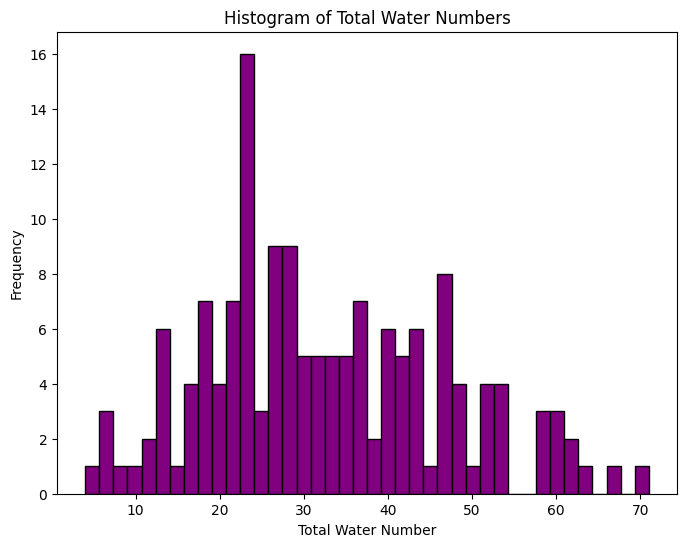

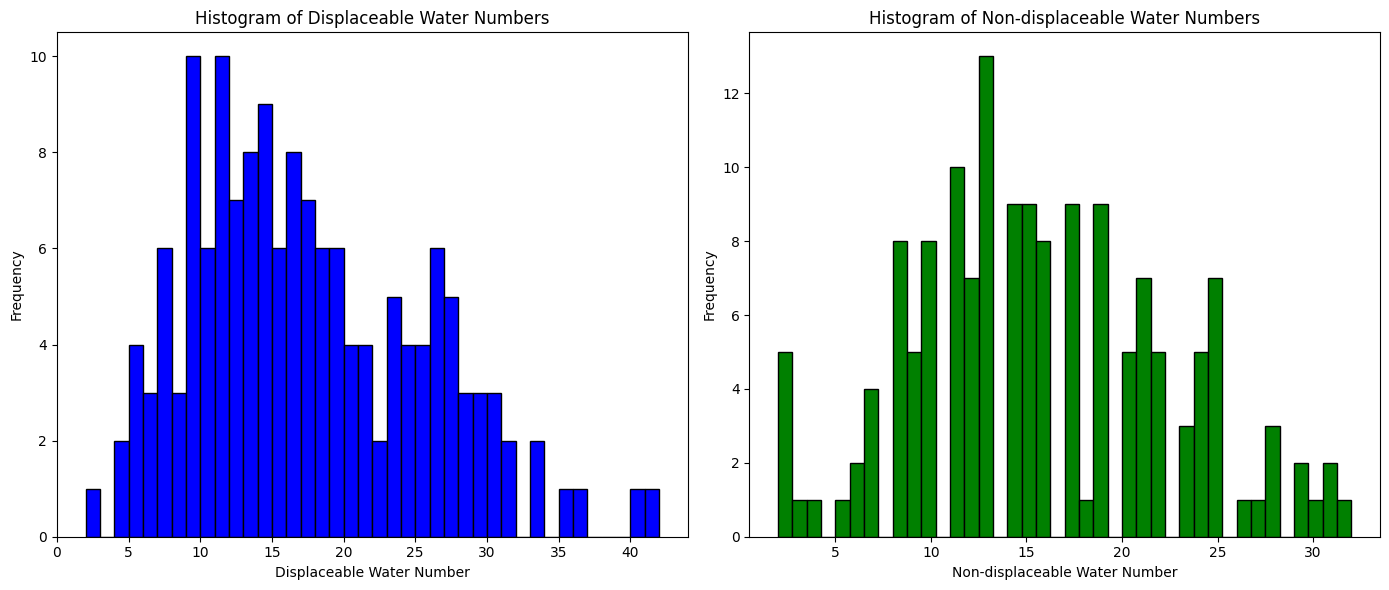

       displaceable_water_num  non_displaceable_water_num  total_water_num
count              153.000000                  153.000000       153.000000
mean                16.986928                   15.588235        32.575163
std                  8.069588                    6.755631        14.138271
min                  2.000000                    2.000000         4.000000
25%                 11.000000                   11.000000        23.000000
50%                 16.000000                   15.000000        30.000000
75%                 23.000000                   20.000000        43.000000
max                 42.000000                   32.000000        71.000000


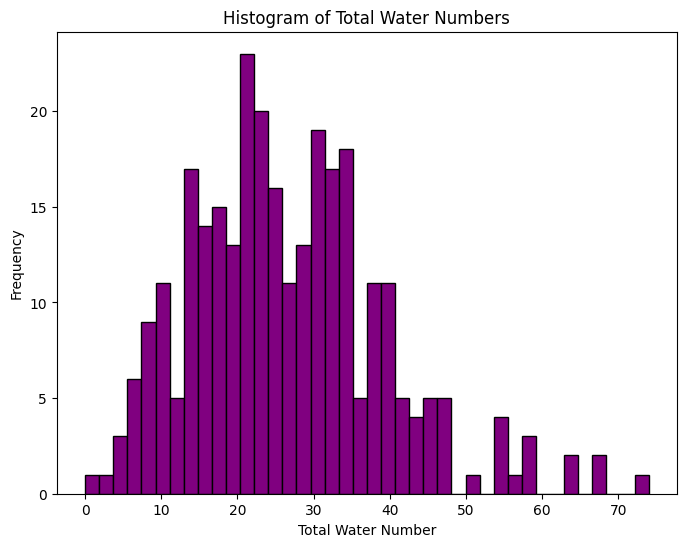

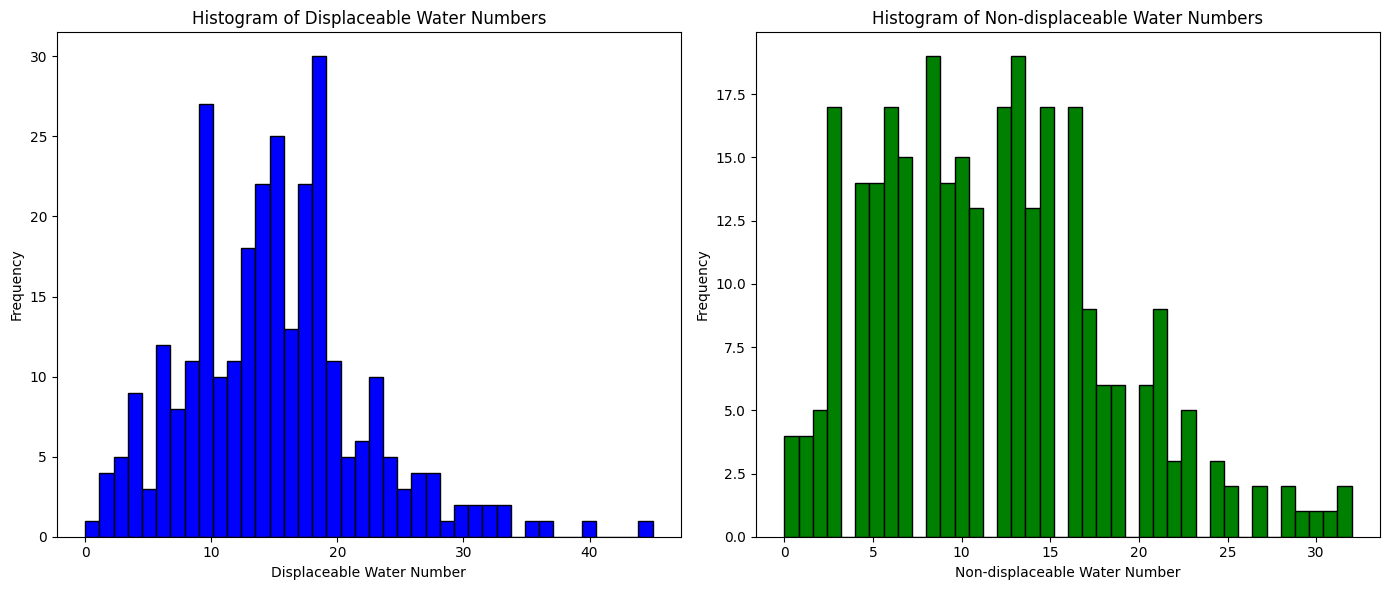

       displaceable_water_num  non_displaceable_water_num  total_water_num
count              292.000000                  292.000000       292.000000
mean                14.986301                   11.575342        26.561644
std                  7.091436                    6.609205        12.745714
min                  0.000000                    0.000000         0.000000
25%                 10.000000                    6.000000        17.000000
50%                 15.000000                   11.000000        25.000000
75%                 19.000000                   16.000000        34.000000
max                 45.000000                   32.000000        74.000000


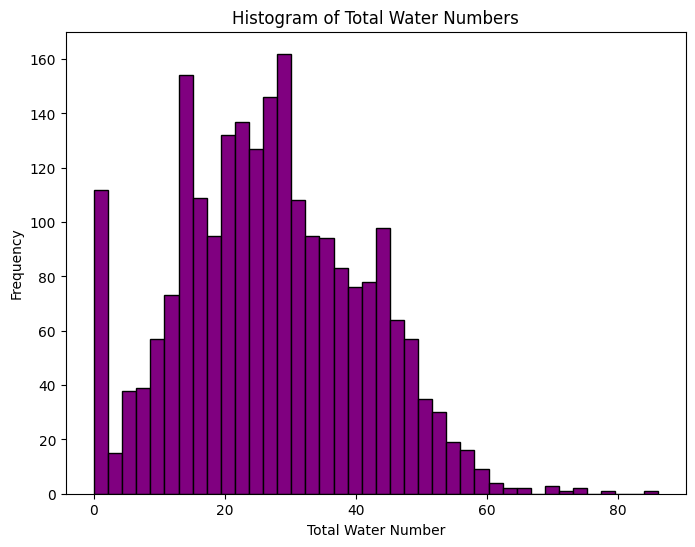

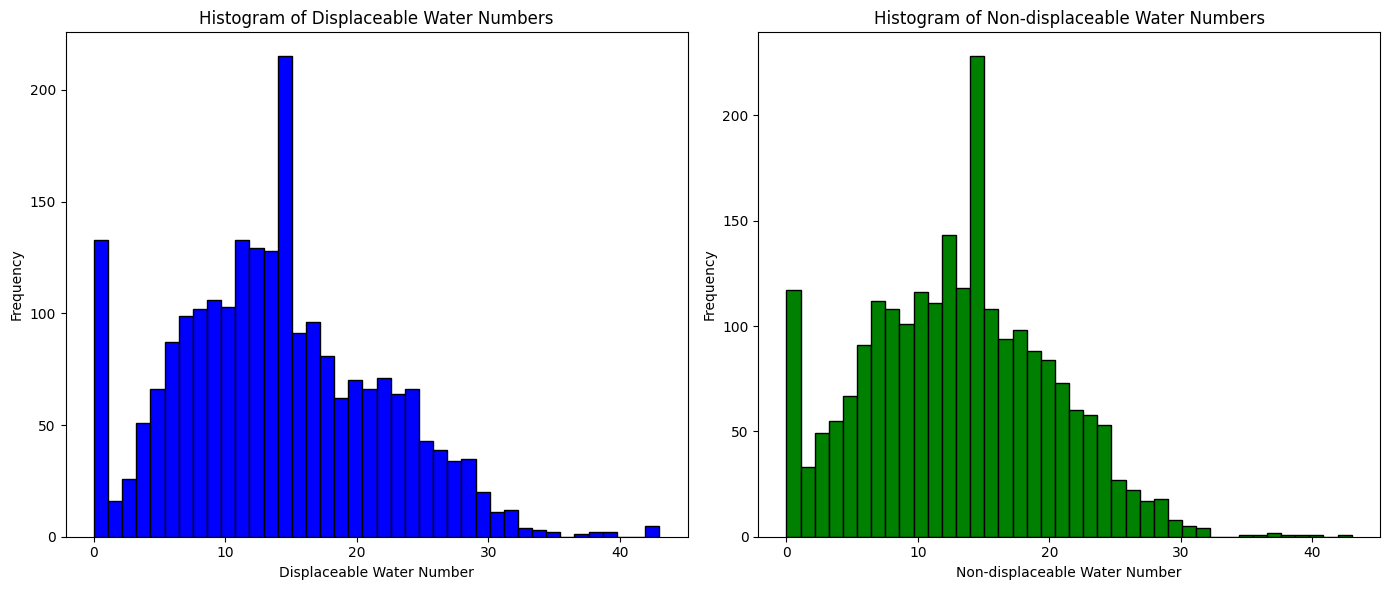

       displaceable_water_num  non_displaceable_water_num  total_water_num
count             2274.000000                 2274.000000      2274.000000
mean                13.903254                   13.096746        27.000000
std                  7.690811                    7.001059        14.004524
min                  0.000000                    0.000000         0.000000
25%                  8.000000                    8.000000        17.000000
50%                 13.000000                   13.000000        26.000000
75%                 19.000000                   18.000000        37.000000
max                 43.000000                   43.000000        86.000000


In [63]:
analyze_water_num('../../data/hydrophilic_2000_pdb')
analyze_water_num('../../data/hydrophobic_2000_pdb')
analyze_water_num('../../data/neutral_2000_pdb')

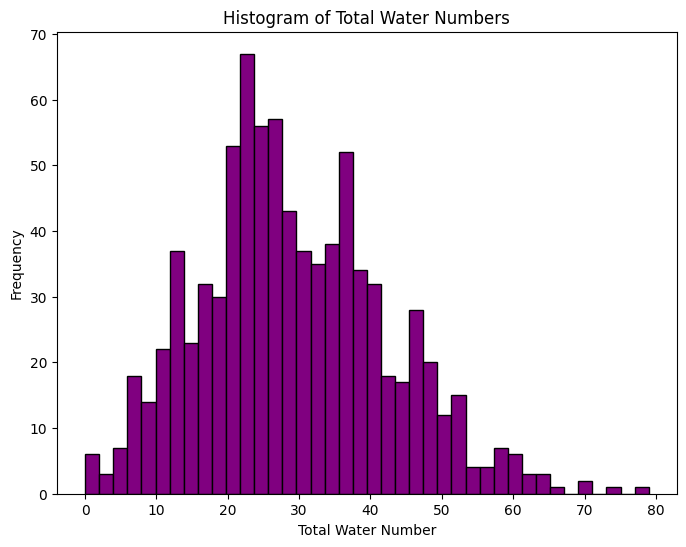

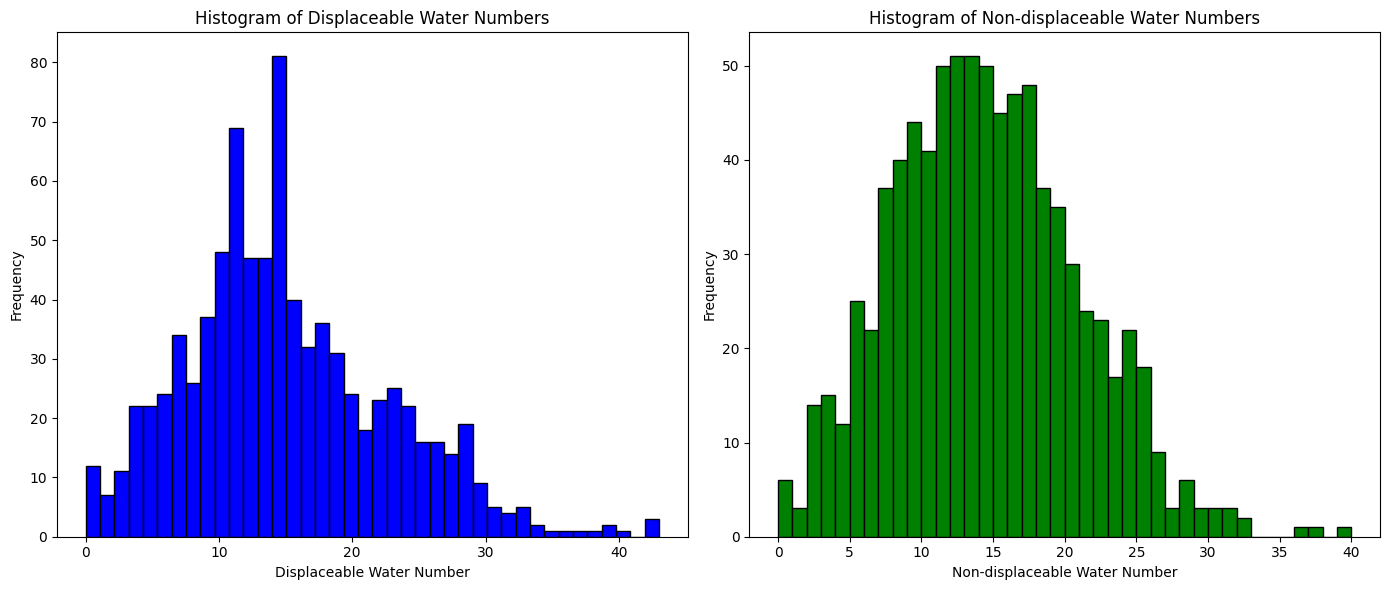

       displaceable_water_num  non_displaceable_water_num  total_water_num
count              838.000000                  838.000000       838.000000
mean                14.977327                   14.026253        29.003580
std                  7.598856                    6.472571        13.304134
min                  0.000000                    0.000000         0.000000
25%                 10.000000                    9.000000        20.000000
50%                 14.000000                   14.000000        27.000000
75%                 20.000000                   18.000000        37.000000
max                 43.000000                   40.000000        79.000000


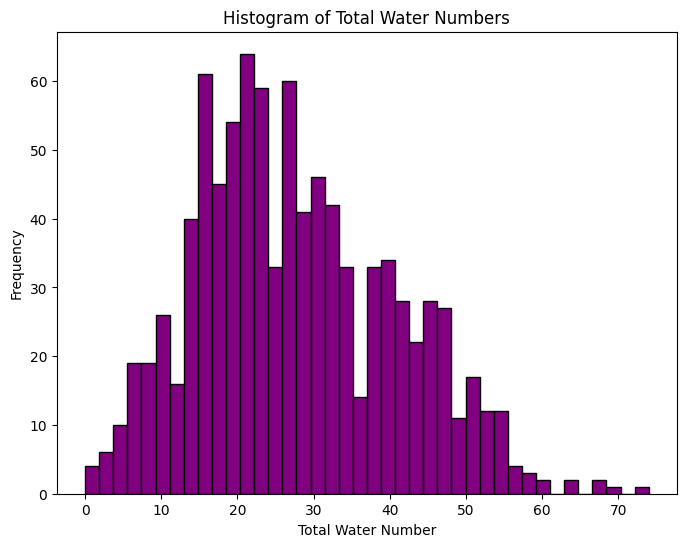

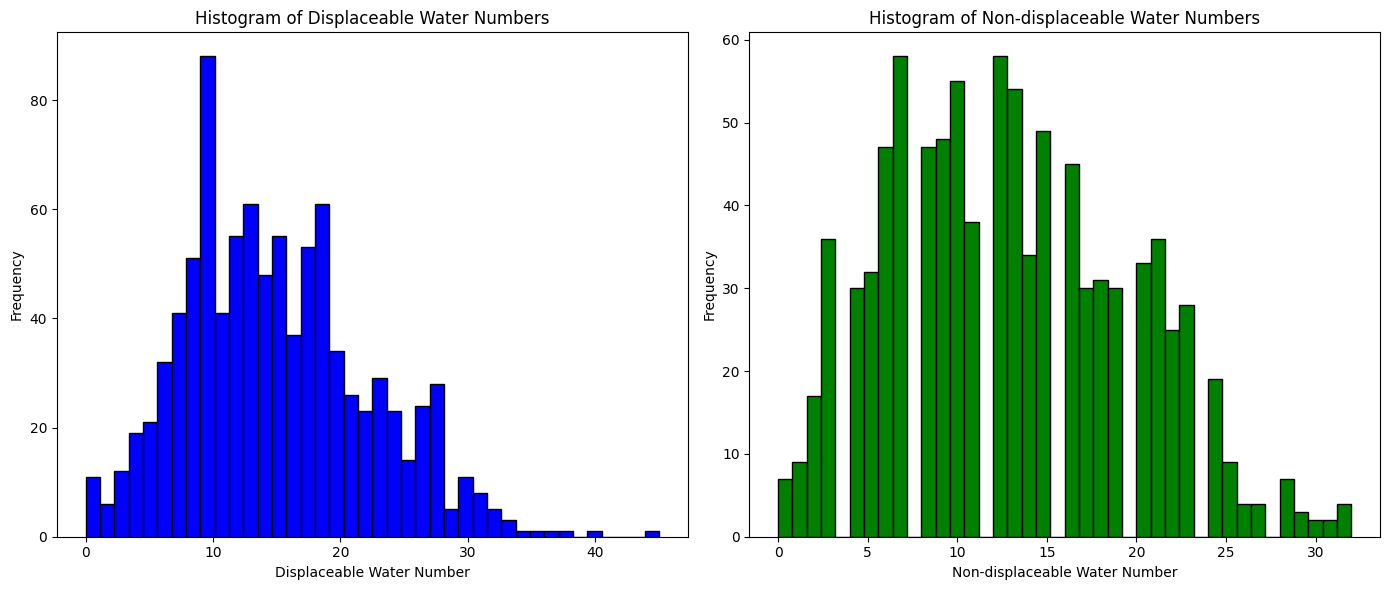

       displaceable_water_num  non_displaceable_water_num  total_water_num
count              931.000000                  931.000000       931.000000
mean                14.902256                   12.779807        27.682062
std                  7.251111                    6.671385        13.059166
min                  0.000000                    0.000000         0.000000
25%                  9.000000                    7.000000        18.000000
50%                 14.000000                   12.000000        26.000000
75%                 20.000000                   18.000000        37.000000
max                 45.000000                   32.000000        74.000000


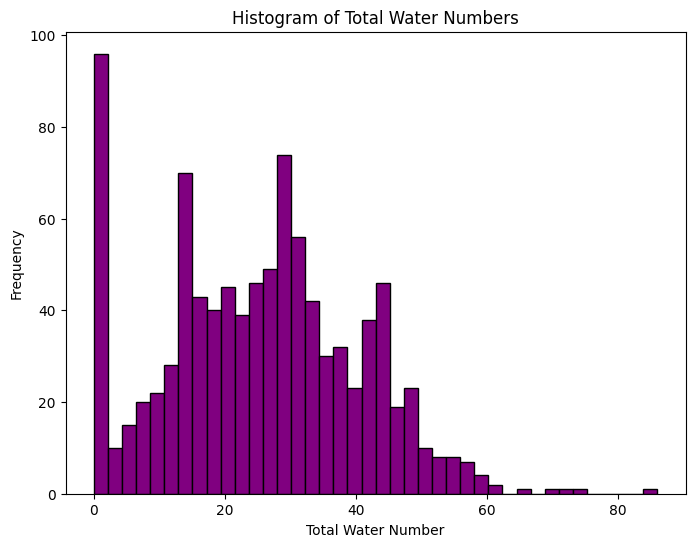

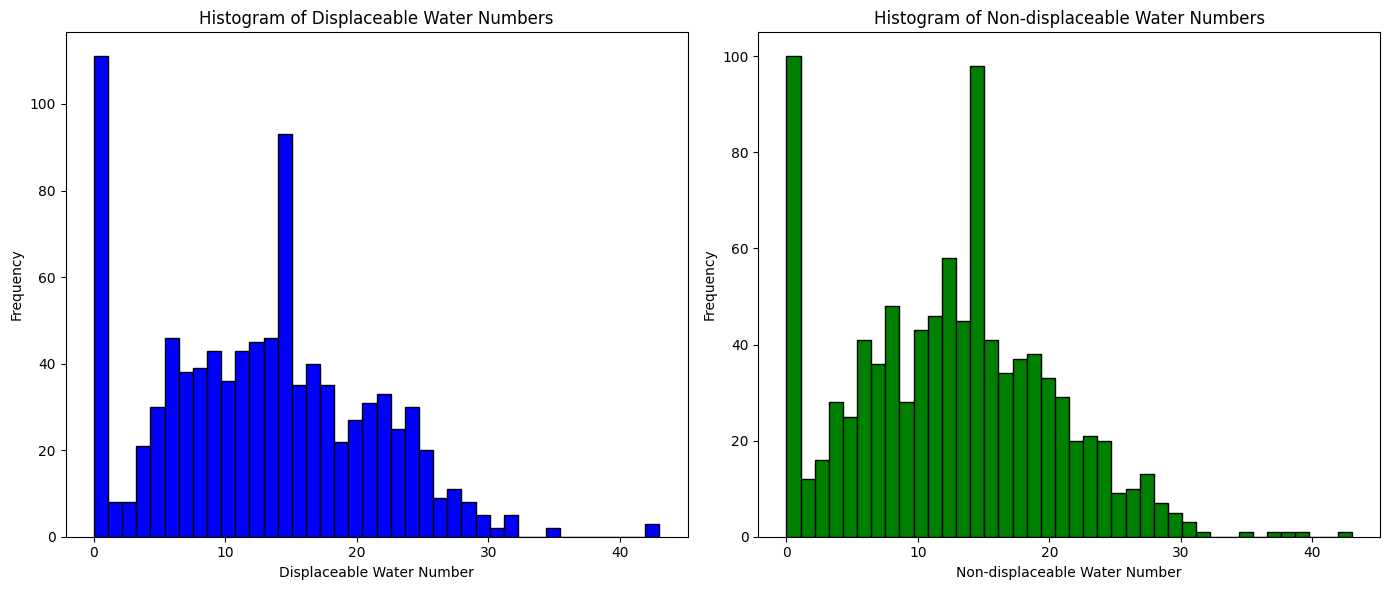

       displaceable_water_num  non_displaceable_water_num  total_water_num
count              950.000000                  950.000000       950.000000
mean                12.806316                   12.521053        25.327368
std                  7.984862                    7.619444        15.053721
min                  0.000000                    0.000000         0.000000
25%                  7.000000                    7.000000        14.000000
50%                 13.000000                   12.000000        26.000000
75%                 18.000000                   18.000000        36.000000
max                 43.000000                   43.000000        86.000000


In [64]:
analyze_water_num('../../data/hydrophilic_500_pdb')
analyze_water_num('../../data/hydrophobic_500_pdb')
analyze_water_num('../../data/neutral_500_pdb')

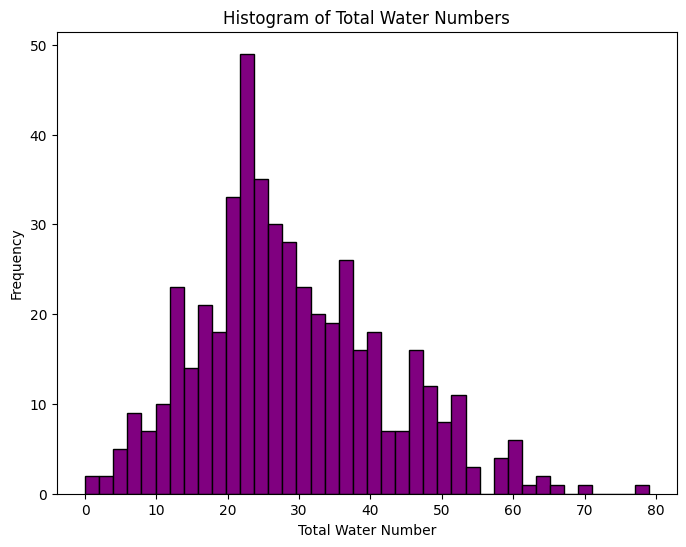

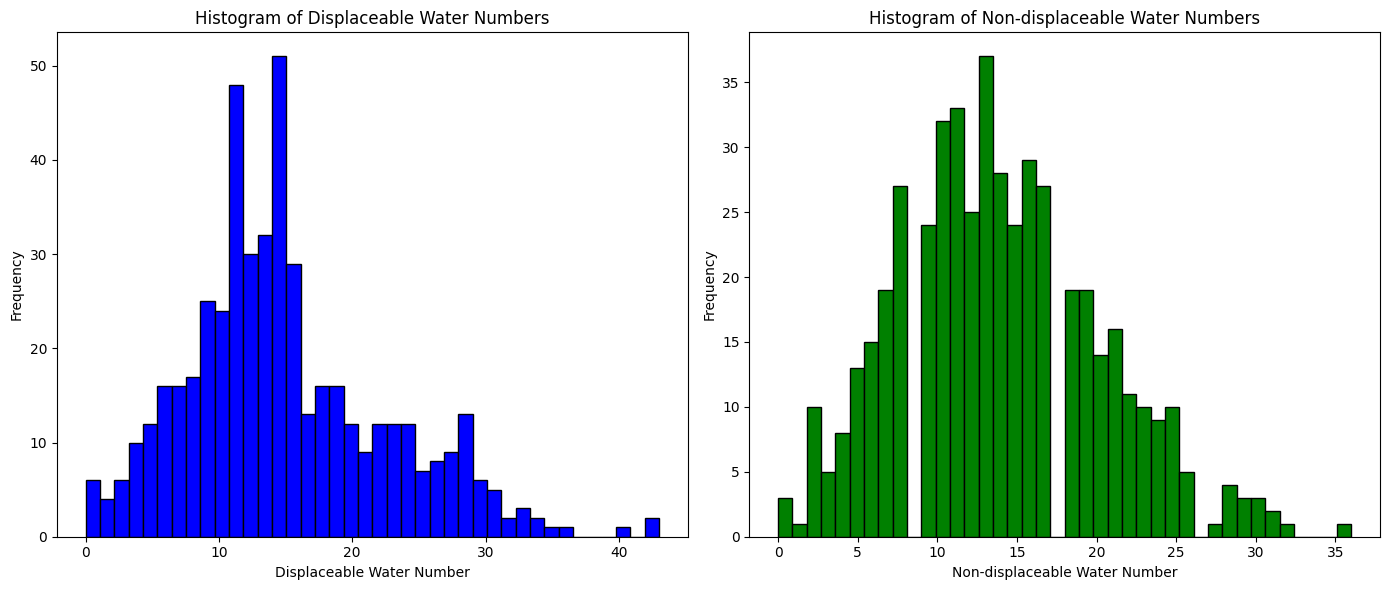

       displaceable_water_num  non_displaceable_water_num  total_water_num
count              488.000000                  488.000000       488.000000
mean                14.887295                   13.852459        28.739754
std                  7.548991                    6.348758        13.223862
min                  0.000000                    0.000000         0.000000
25%                 10.000000                    9.000000        20.750000
50%                 13.000000                   13.000000        27.000000
75%                 19.000000                   18.000000        36.000000
max                 43.000000                   36.000000        79.000000


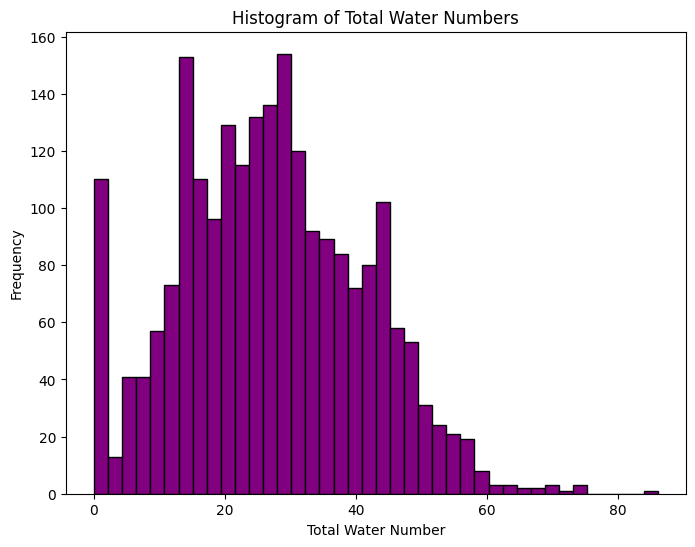

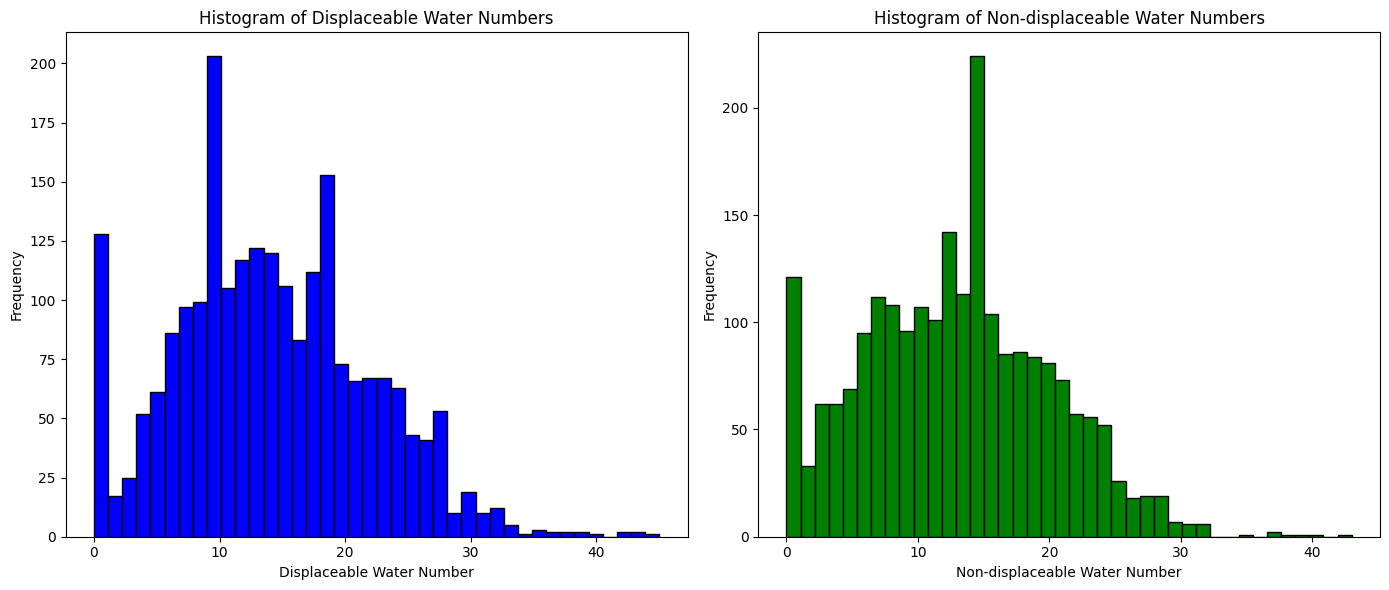

       displaceable_water_num  non_displaceable_water_num  total_water_num
count             2231.000000                 2231.000000      2231.000000
mean                14.041237                   12.903182        26.944420
std                  7.708425                    7.108799        14.072508
min                  0.000000                    0.000000         0.000000
25%                  8.000000                    8.000000        17.000000
50%                 14.000000                   13.000000        26.000000
75%                 19.000000                   18.000000        37.000000
max                 45.000000                   43.000000        86.000000


In [65]:
analyze_water_num('../../data/hydrophilic_-1000_pdb')
analyze_water_num('../../data/hydrophobic_-1000_pdb')
# analyze_water_num('../../data/neutral_500_pdb')

In [ ]:
analyze_water_num('../../data/hydrophilic_pdb')
analyze_water_num('../../data/hydrophobic_pdb')